In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("/kaggle/input/dataset/time_series_data_human_activities.csv")

In [3]:
df.activity.value_counts()

Walking       417901
Jogging       324600
Upstairs      122598
Downstairs    100192
Sitting        59939
Standing       48393
Name: activity, dtype: int64

In [4]:
def gender_to_numeric(x):
    
        if x=='Walking':    return 0
        if x=='Jogging':    return 1
        if x=='Upstairs':   return 2
        if x=='Downstairs':  return 3
        if x=='Sitting':    return 4
        if x=='Standing':   return 5

df['activity_num'] = df['activity'].apply(gender_to_numeric)
print(df)

         user  activity       timestamp  x-axis  y-axis    z-axis  \
0           1   Walking   4991922345000    0.69   10.80 -2.030000   
1           1   Walking   4991972333000    6.85    7.44 -0.500000   
2           1   Walking   4992022351000    0.93    5.63 -0.500000   
3           1   Walking   4992072339000   -2.11    5.01 -0.690000   
4           1   Walking   4992122358000   -4.59    4.29 -1.950000   
...       ...       ...             ...     ...     ...       ...   
1073618    36  Standing  15049012250000   -0.91    9.43  2.533385   
1073619    36  Standing  15049062268000   -1.18    9.51  2.492524   
1073620    36  Standing  15049112287000   -1.50    9.53  2.533385   
1073621    36  Standing  15049162275000   -2.07    8.77  2.179256   
1073622    36  Standing  15049212262000   -2.14    9.89  3.255263   

         activity_num  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
107

In [5]:
#X=df.drop('activity',1)
#X=df[['t]]
X=df[['x-axis', 'y-axis', 'z-axis']].values
print(X)

[[ 0.69      10.8       -2.03     ]
 [ 6.85       7.44      -0.5      ]
 [ 0.93       5.63      -0.5      ]
 ...
 [-1.5        9.53       2.5333846]
 [-2.07       8.77       2.1792557]
 [-2.14       9.89       3.255263 ]]


In [6]:
y=df['activity_num'].values
y

array([0, 0, 0, ..., 5, 5, 5])

In [7]:
from sklearn.model_selection import train_test_split as tts

In [8]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)
X_train

array([[  0.91      ,  -0.23      ,   9.66      ],
       [ 10.95      ,   0.93      ,  -8.69      ],
       [ 15.64      ,   9.34      ,  11.985906  ],
       ...,
       [-13.21      ,  19.38      ,  -8.62168   ],
       [  2.07      , -10.8       , -12.37      ],
       [  0.65      ,  11.18      ,   0.42223078]])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
SC=StandardScaler()
X_train_scale=SC.fit_transform(X_train)
X_test_scale=SC.transform(X_test)

LG=LogisticRegression()
LG.fit(X_train_scale,y_train)
X_pred=LG.predict(X_test_scale)
print(X_pred)
LG.score(X_test_scale,y_test)


[1 1 1 ... 0 0 0]


0.47715368828918897

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

In [11]:
epochs = 10
batch_size = 64
opt = 'adam'
model = Sequential()
model.add(Reshape((1,X_train.shape[1],1)))
model.add(Conv2D(filters=32,kernel_size=(1,5),padding='same',activation='relu',input_shape=(1,X_train.shape[1],1)))
#model.add(MaxPooling2D(pool_size=(1,6),strides=(1,2)))
model.add(MaxPooling2D(pool_size=(1,3),strides=(1,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_absolute_percentage_error',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs, batch_size=batch_size)

2022-12-04 13:52:44.865302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 13:52:44.989775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 13:52:44.990601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 13:52:44.991767: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10


2022-12-04 13:52:49.055970: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


11743/11743 [==============================] - 44s 3ms/step - loss: 1894786.0000 - accuracy: 0.3896 - val_loss: 67568.5547 - val_accuracy: 0.3885
Epoch 2/10
11743/11743 [==============================] - 35s 3ms/step - loss: 52770.2070 - accuracy: 0.3896 - val_loss: 47068.9336 - val_accuracy: 0.3885
Epoch 3/10
11743/11743 [==============================] - 35s 3ms/step - loss: 54325.9180 - accuracy: 0.3896 - val_loss: 2140.5479 - val_accuracy: 0.3885
Epoch 4/10
11743/11743 [==============================] - 39s 3ms/step - loss: 53415.0586 - accuracy: 0.3896 - val_loss: 43492.1055 - val_accuracy: 0.3885
Epoch 5/10
11743/11743 [==============================] - 35s 3ms/step - loss: 54546.2344 - accuracy: 0.3896 - val_loss: 28027.7402 - val_accuracy: 0.3885
Epoch 6/10
11743/11743 [==============================] - 38s 3ms/step - loss: 52335.7227 - accuracy: 0.3896 - val_loss: 54486.0312 - val_accuracy: 0.3885
Epoch 7/10
11743/11743 [==============================] - 38s 3ms/step - loss: 5

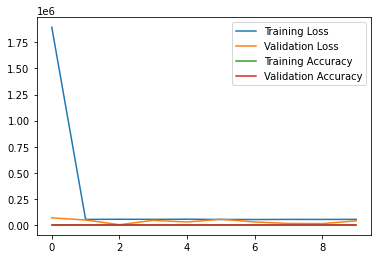

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
SC=StandardScaler()
X_train_scale=SC.fit_transform(X_train)
X_test_scale=SC.transform(X_test)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scale,y_train)
X_pred=rf_clf.predict(X_test_scale)
print(X_pred)
rf_clf.score(X_test_scale,y_test)

[5 0 1 ... 0 0 0]


0.6349744013263497

In [17]:
epochs = 2
batch_size = 64
opt = 'adam'
model = Sequential()
model.add(Reshape((1,X_train.shape[1],1)))
model.add(Conv2D(filters=32,kernel_size=(1,5),padding='same',activation='relu',input_shape=(1,X_train.shape[1],1)))
#model.add(MaxPooling2D(pool_size=(1,6),strides=(1,2)))
model.add(MaxPooling2D(pool_size=(1,3),strides=(1,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_absolute_percentage_error',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs, batch_size=batch_size)

Epoch 1/2
11743/11743 [==============================] - 39s 3ms/step - loss: 2021584.2500 - accuracy: 0.3896 - val_loss: 3483.0488 - val_accuracy: 0.3885
Epoch 2/2
11743/11743 [==============================] - 38s 3ms/step - loss: 52865.0234 - accuracy: 0.3896 - val_loss: 26152.7637 - val_accuracy: 0.3885


In [20]:
from sklearn.preprocessing import StandardScaler

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
SC=StandardScaler()
X_train_scale=SC.fit_transform(X_train)
X_test_scale=SC.transform(X_test)

rf_clf = GaussianNB()
rf_clf.fit(X_train_scale,y_train)
X_pred=rf_clf.predict(X_test_scale)
print(X_pred)
rf_clf.score(X_test_scale,y_test)

[0 0 1 ... 0 0 5]


0.5471037328423687

In [28]:
epochs = 2
batch_size = 64
opt = 'adam'
model = Sequential()
model.add(Reshape((1,X_train.shape[1],1)))
model.add(Conv2D(filters=32,kernel_size=(1,5),padding='same',activation='relu',input_shape=(1,X_train.shape[1],1)))
#model.add(MaxPooling2D(pool_size=(1,6),strides=(1,2)))
model.add(MaxPooling2D(pool_size=(1,3),strides=(1,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_absolute_percentage_error',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs, batch_size=batch_size)

Epoch 1/2
11743/11743 [==============================] - 36s 3ms/step - loss: 1460963.6250 - accuracy: 0.3896 - val_loss: 36140.2930 - val_accuracy: 0.3885
Epoch 2/2
11743/11743 [==============================] - 40s 3ms/step - loss: 53011.0039 - accuracy: 0.3896 - val_loss: 73129.1953 - val_accuracy: 0.3885


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.svm import LinearSVR

In [32]:
SC=StandardScaler()
X_train_scale=SC.fit_transform(X_train)
X_test_scale=SC.transform(X_test)

rf_clf = LinearSVR()
rf_clf.fit(X_train_scale,y_train)
X_pred=rf_clf.predict(X_test_scale)
print(X_pred)
rf_clf.score(X_test_scale,y_test)

[1. 1. 1. ... 1. 1. 1.]


-0.03350459075534351

In [33]:
epochs = 2
batch_size = 64
opt = 'adam'
model = Sequential()
model.add(Reshape((1,X_train.shape[1],1)))
model.add(Conv2D(filters=32,kernel_size=(1,5),padding='same',activation='relu',input_shape=(1,X_train.shape[1],1)))
#model.add(MaxPooling2D(pool_size=(1,6),strides=(1,2)))
model.add(MaxPooling2D(pool_size=(1,3),strides=(1,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_absolute_percentage_error',optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs, batch_size=batch_size)

Epoch 1/2
11743/11743 [==============================] - 36s 3ms/step - loss: 1834053.0000 - accuracy: 0.3896 - val_loss: 54990.0273 - val_accuracy: 0.3885
Epoch 2/2
11743/11743 [==============================] - 35s 3ms/step - loss: 56981.5508 - accuracy: 0.3896 - val_loss: 3711.3032 - val_accuracy: 0.3885
